In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pisa = pd.read_csv('Pisa_Data.csv')

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
# pisa.head()

In [4]:
pisa.shape

(1166, 7)

In [5]:
pd.set_option('display.max_rows', 1500)
pisa.head()

,Country Name,Country Code,Series Name,Series Code,2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Albania,ALB,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,..,..,413.157
1,Albania,ALB,PISA: Mean performance on the mathematics scal...,LO.PISA.MAT.FE,..,..,417.750029482799
2,Albania,ALB,PISA: Mean performance on the mathematics scal...,LO.PISA.MAT.MA,..,..,408.545458736189
3,Albania,ALB,PISA: Mean performance on the reading scale,LO.PISA.REA,..,..,405.2588
4,Albania,ALB,PISA: Mean performance on the reading scale. F...,LO.PISA.REA.FE,..,..,434.639625546737


In [6]:
# Just trying to read the full column. No luck... :-/
pd.options.display.width = 300
pisa['Series Name'].str.strip()

0         PISA: Mean performance on the mathematics scale
1       PISA: Mean performance on the mathematics scal...
2       PISA: Mean performance on the mathematics scal...
3             PISA: Mean performance on the reading scale
4       PISA: Mean performance on the reading scale. F...
5       PISA: Mean performance on the reading scale. Male
6             PISA: Mean performance on the science scale
7       PISA: Mean performance on the science scale. F...
8       PISA: Mean performance on the science scale. Male
9         PISA: Mean performance on the mathematics scale
10      PISA: Mean performance on the mathematics scal...
11      PISA: Mean performance on the mathematics scal...
12            PISA: Mean performance on the reading scale
13      PISA: Mean performance on the reading scale. F...
14      PISA: Mean performance on the reading scale. Male
15            PISA: Mean performance on the science scale
16      PISA: Mean performance on the science scale. F...
17      PISA: 

In [7]:
pisa_math = pisa[pisa['Series Code'] == 'LO.PISA.MAT']

In [8]:
pisa_math.head()

,Country Name,Country Code,Series Name,Series Code,2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Albania,ALB,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,..,..,413.157
9,Algeria,DZA,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,..,..,359.6062
18,Argentina,ARG,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,..,..,409.0333
27,Armenia,ARM,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,..,..,..
36,Australia,AUS,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,..,..,493.8962


In [9]:
pisa_math[['Country Name','2015 [YR2015]']].head()

,Country Name,2015 [YR2015]
0,Albania,413.157
9,Algeria,359.6062
18,Argentina,409.0333
27,Armenia,..
36,Australia,493.8962


In [10]:
pisa_math.dtypes

Country Name     object
Country Code     object
Series Name      object
Series Code      object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
dtype: object

In [11]:
pisa_math['2015 [YR2015]'] = pd.to_numeric(pisa_math['2015 [YR2015]'], errors='coerce').dropna()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
pisa_math.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
2013 [YR2013]     object
2014 [YR2014]     object
2015 [YR2015]    float64
dtype: object

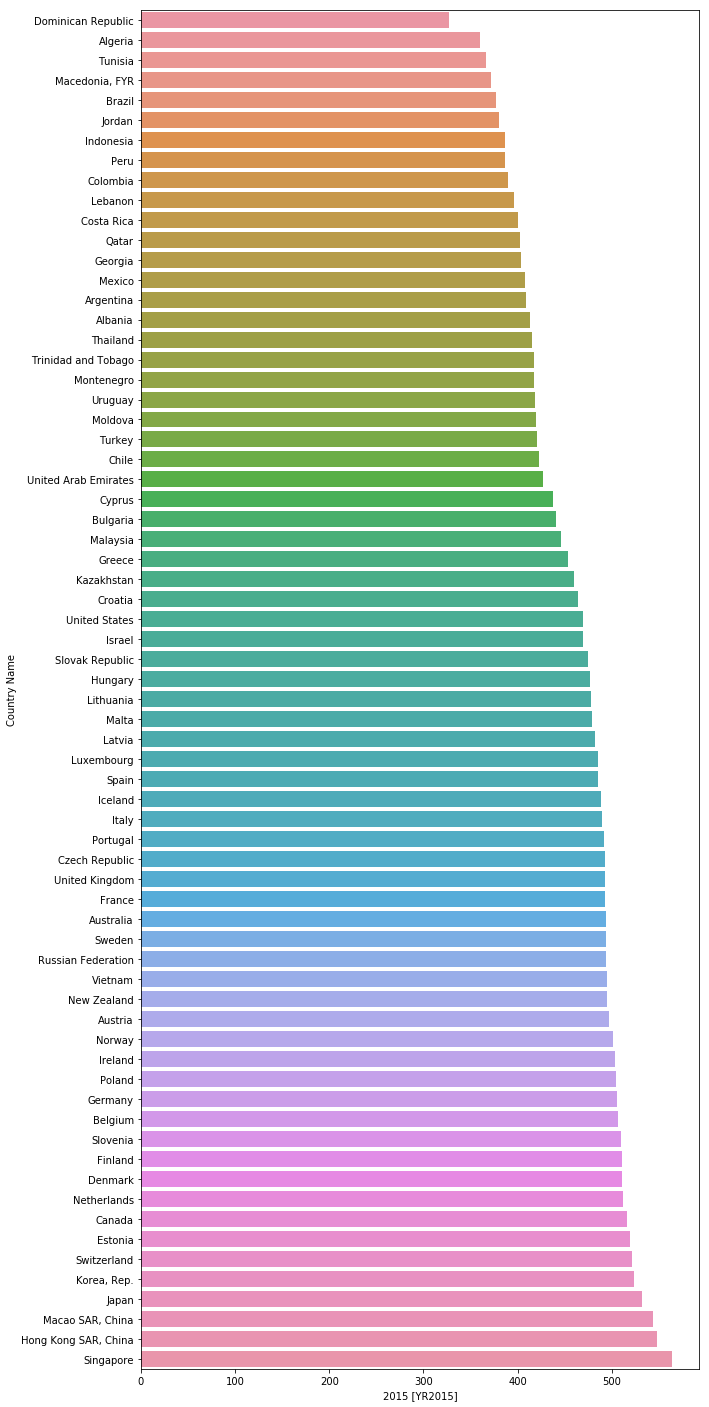

In [13]:
pisa_math = pisa_math.dropna(axis=0, how='any')
pisa_math = pisa_math.sort_values(["2015 [YR2015]"])
plt.figure(figsize=(10,25))
sns.barplot(x="2015 [YR2015]", y="Country Name", data=pisa_math)
plt.show()

In [14]:
pisa_math_f = pisa[pisa['Series Code'] == 'LO.PISA.MAT']

In [15]:
pisa.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]'], dtype='object')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


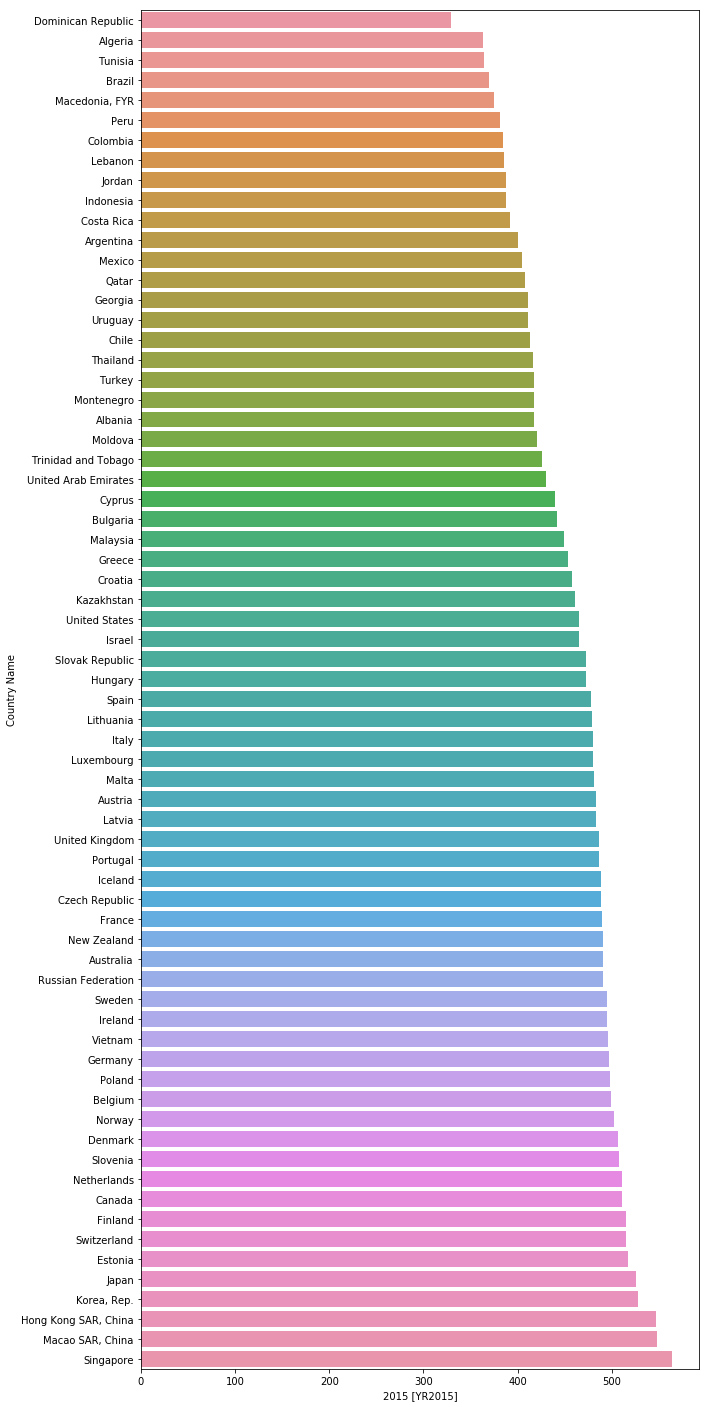

In [16]:
pisa_math_f = pisa[pisa['Series Code'] == 'LO.PISA.MAT.FE']
pisa_math_f['2015 [YR2015]'] = pd.to_numeric(pisa_math_f['2015 [YR2015]'], errors='coerce')
pisa_math_f = pisa_math_f.dropna(axis=0, how='any')
pisa_math_f = pisa_math_f.sort_values(["2015 [YR2015]"])
plt.figure(figsize=(10,25))
sns.barplot(x="2015 [YR2015]", y="Country Name", data=pisa_math_f)
plt.show()

In [17]:
def make_graph(score_name, title):
    temp_df = pisa[pisa['Series Code'] == score_name]
    temp_df['2015 [YR2015]'] = pd.to_numeric(temp_df['2015 [YR2015]'], errors='coerce')
    temp_df = temp_df.dropna(axis=0, how='any')
    temp_df = temp_df.sort_values(["2015 [YR2015]"])
    plt.figure(figsize=(10,25))
    sns.barplot(x="2015 [YR2015]", y="Country Name", data=temp_df)
    plt.title(title)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


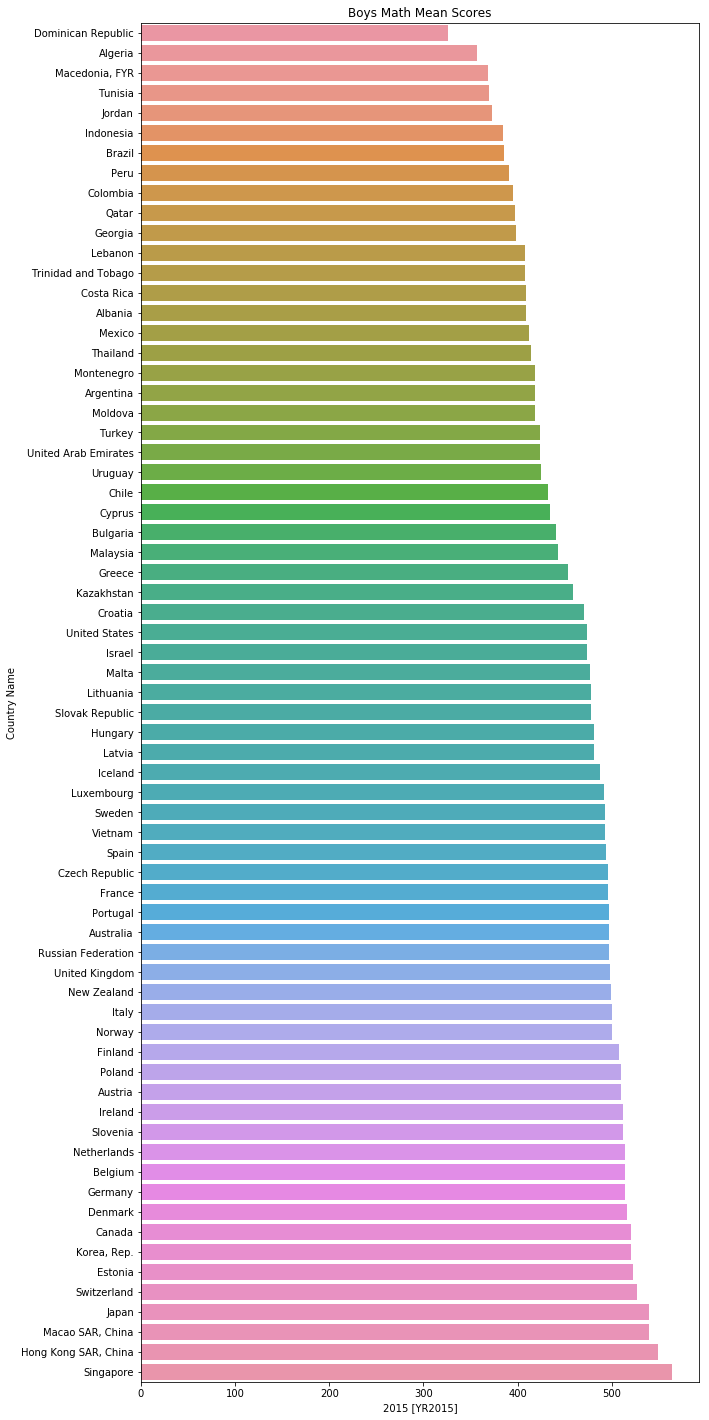

In [18]:
make_graph('LO.PISA.MAT.MA', 'Boys Math Mean Scores')

In [4]:
EdStatsData = pd.read_csv('EdStatsData.csv')

In [20]:
EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 68
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
EdStatsData.shape

(876040, 69)

In [22]:
EdStatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100',
       'Unnamed: 68'],
      dtype='object')

In [13]:
EdStatsData[EdStatsData['Country Name'].isin(['Singapore'])]['2014']

705900              NaN
705901              NaN
705902              NaN
705903              NaN
705904              NaN
705905              NaN
705906              NaN
705907              NaN
705908              NaN
705909              NaN
705910              NaN
705911              NaN
705912              NaN
705913              NaN
705914              NaN
705915              NaN
705916        79.195892
705917    151779.000000
705918    120202.000000
705919     31576.000000
705920        96.716660
705921        94.911324
705922         0.962500
705923        98.608948
705924              NaN
705925              NaN
705926              NaN
705927              NaN
705928              NaN
705929              NaN
705930              NaN
705931              NaN
705932              NaN
705933              NaN
705934              NaN
705935              NaN
705936              NaN
705937              NaN
705938              NaN
705939              NaN
705940              NaN
705941          

In [23]:
EdStatsCounty = pd.read_csv('EdStatsCountry.csv')

In [24]:
EdStatsCounty.shape

(241, 32)

In [25]:
EdStatsCounty.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [26]:
EdStatsCounty.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census',
       'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [27]:
Ed_Data = pd.read_csv('EdStatsCountry-Series.csv')

In [28]:
Ed_Data.shape

(603, 4)

In [29]:
Ed_Data.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [30]:
footnote = pd.read_csv('EdStatsFootNote.csv')

In [31]:
footnote.shape

(650592, 5)

In [32]:
footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [33]:
EdStatsSeries = pd.read_csv('EdStatsSeries.csv')

In [34]:
EdStatsSeries.shape

(3620, 21)

In [35]:
EdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
list(EdStatsData['Indicator Name'].unique())

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [37]:
list(EdStatsData['Country Name'].unique())

['Arab World',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia',
 'Euro area',
 'European Union',
 'High income',
 'Heavily indebted poor countries (HIPC)',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean',
 'Least developed countries: UN classification',
 'Low income',
 'Lower middle income',
 'Low & middle income',
 'Middle East & North Africa',
 'Middle income',
 'Middle East & North Africa (excluding high income)',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa',
 'Upper middle income',
 'World',
 'Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Ba

In [38]:
def get_info(ind_name):
    return EdStatsData[EdStatsData['Indicator Name'] == ind_name]

In [59]:
percent_lower_secondary = get_info('Capital expenditure as % of total expenditure in lower secondary public institutions (%)')

In [60]:
percent_lower_secondary

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 68
509,Arab World,ARB,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.2.FDPUB.FNCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4129,East Asia & Pacific (excluding high income),EAP,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.2.FDPUB.FNCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7749,East Asia & Pacific,EAS,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.2.FDPUB.FNCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11369,Europe & Central Asia (excluding high income),ECA,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.2.FDPUB.FNCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14989,Europe & Central Asia,ECS,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.2.FDPUB.FNCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18609,Euro area,EMU,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.2.FDPUB.FNCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22229,European Union,EUU,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.2.FDPUB.FNCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25849,High income,HIC,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.2.FDPUB.FNCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29469,Heavily indebted poor countries (HIPC),HPC,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.2.FDPUB.FNCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33089,Latin America & Caribbean (excluding high income),LAC,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.2.FDPUB.FNCAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [39]:
teacher_starting_salary = get_info('Annual statutory teacher salaries in public institutions in USD. Primary. Starting salary')

In [40]:
teacher_starting_salary[teacher_starting_salary['Country Name'].isin(['Japan','Finland', 'United States', 'Philippines'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 68
315083,Finland,FIN,Annual statutory teacher salaries in public in...,OECD.TSAL.1.E0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18109.791861,18489.059275,19834.610177,26646.786368,27022.549852,27922.165156,27806.220896,27708.392980,28201.025641,29386.013340,32691.992348,29028.821562,30586.613360,32148.083517,32356.470967,32157.361190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445403,Japan,JPN,Annual statutory teacher salaries in public in...,OECD.TSAL.1.E0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22669.594812,22799.724935,23493.330956,24513.899228,24468.728690,25592.747800,26255.568358,27283.511269,27545.303027,27994.800102,25453.614728,26031.275803,27067.069515,27627.211698,28101.201795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644503,Philippines,PHL,Annual statutory teacher salaries in public in...,OECD.TSAL.1.E0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12620.456624,10409.274113,10777.229602,9889.552239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825503,United States,USA,Annual statutory teacher salaries in public in...,OECD.TSAL.1.E0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25707.000000,27631.000000,28681.000000,29513.000000,30339.364000,32703.000000,33520.575000,34894.918575,35906.871214,35998.930000,36501.590000,36857.830000,37594.810000,36332.970000,41605.700000,42255.630000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
teacher_starting_salary.shape

(242, 69)

In [42]:
top_pay = get_info('Annual statutory teacher salaries in public institutions in USD. Primary. Top of scale')

In [43]:
top_pay[top_pay['Country Name'].isin(['Japan','Finland', 'United States', 'Philippines'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 68
315084,Finland,FIN,Annual statutory teacher salaries in public in...,OECD.TSAL.1.ETOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25614.750651,26139.704492,28075.398593,33557.984705,31785.144845,32541.413056,32406.287787,45164.168387,46003.076923,47976.212507,50460.781634,39702.260159,40159.503969,41811.482294,42082.502921,41823.525411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445404,Japan,JPN,Annual statutory teacher salaries in public in...,OECD.TSAL.1.ETOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54663.494255,54921.246551,56579.094621,57327.108116,58372.775249,61054.243326,62644.800624,61627.193521,61518.125336,62441.965423,56542.983872,57620.920643,59643.442712,60877.739916,61922.197320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644504,Philippines,PHL,Annual statutory teacher salaries in public in...,OECD.TSAL.1.ETOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14609.181026,12373.790227,12810.626186,11756.218905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825504,United States,USA,Annual statutory teacher salaries in public in...,OECD.TSAL.1.ETOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43094.000000,48782.000000,50636.000000,52104.000000,53562.912000,NaN,NaN,NaN,NaN,50922.150000,51633.170000,52137.100000,53179.590000,58792.900000,66937.690000,67983.340000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
pd.read_excel('SOWC_2013.xlsx')

,TABLE 5. EDUCATION,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
NaN,NaN,TABLEAU 5. ÉDUCATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,TABLA 5. EDUCACIÓN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Countries and areas,NaN,NaN,Youth (15–24 years) literacy rate (%),NaN,NaN,NaN,Number per 100 population,NaN,Pre-primary school participation,NaN,Primary school participation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secondary school participation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gross enrolment ratio (%),NaN,Gross enrolment ratio (%),NaN,NaN,NaN,Net enrolment ratio (%),NaN,NaN,NaN,Net attendance ratio (%),NaN,NaN,NaN,Survival rate to last primary grade (%),NaN,NaN,NaN,Net enrolment ratio (%),NaN,NaN,NaN,Net attendance ratio (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,2007-2011*,NaN,NaN,NaN,2011,NaN,2008 –2011*,NaN,2008-2011*,NaN,NaN,NaN,2008-2011*,NaN,NaN,NaN,2007-2011*,NaN,NaN,NaN,2008-2011*,NaN,2007-2011*,NaN,2008-2011*,NaN,NaN,NaN,2007-2011*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,male,NaN,female,NaN,mobile phones,Internet users,male,female,male,NaN,female,NaN,male,NaN,female,NaN,male,NaN,female,NaN,admin. data,NaN,survey data,NaN,male,NaN,female,NaN,male,NaN,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,FRENCH HEADINGS,Pays et zones,NaN,Taux\nd’alphabétisation\ndes jeunes\n(15–24 an...,NaN,NaN,NaN,Nombre pour 100 personnes,NaN,Participation au pré-primaire,NaN,Participation à l'école primaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Participation à l'école secondaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taux brut de scolarisation (%),NaN,Taux brut de scolarisationo (%),NaN,NaN,NaN,Taux net de scolarisation (%),NaN,NaN,NaN,Taux net de fréquentation (%),NaN,NaN,NaN,Taux de survie en dernière année d'école prima...,NaN,NaN,NaN,Taux net de scolarisation (%),NaN,NaN,NaN,Taux net de scolarisation (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,2007-2011*,NaN,NaN,NaN,2011,NaN,2008−2011*,NaN,2008−2011*,NaN,NaN,NaN,2008−2011*,NaN,NaN,NaN,2007−2011*,NaN,NaN,NaN,2008−2011*,NaN,2007−2011*,NaN,2008−2011*,NaN,NaN,NaN,2007−2011*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
child_discipline = pd.read_csv('child_discipline.csv')

In [46]:
child_discipline

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Total,2005-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,74.0,1.0
1,Afghanistan,Male,2005-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,75.0,1.0
2,Afghanistan,Female,2005-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,74.0,1.0
3,Albania,Total,2005-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,75.0,1.0
4,Albania,Male,2005-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,78.0,1.0
5,Albania,Female,2005-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,71.0,1.0
6,Algeria,Total,2005-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,88.0,1.0
7,Algeria,Male,2005-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,89.0,1.0
8,Algeria,Female,2005-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,87.0,1.0
9,Armenia,Total,2005-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,70.0,1.0


In [47]:
percent_education = pd.read_csv('percent_education.csv')

In [48]:
percent_education

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Algeria,Total,2007-2010,UN_World Bank,Percent,4.0,1.0
1,Andorra,Total,2007-2010,UN_World Bank,Percent,4.0,1.0
2,Angola,Total,2007-2010,UN_World Bank,Percent,3.0,1.0
3,Antigua and Barbuda,Total,2007-2010,UN_World Bank,Percent,2.0,1.0
4,Argentina,Total,2007-2010,UN_World Bank,Percent,6.0,1.0
5,Armenia,Total,2007-2010,UN_World Bank,Percent,4.0,1.0
6,Australia,Total,2007-2010,UN_World Bank,Percent,5.0,1.0
7,Austria,Total,2007-2010,UN_World Bank,Percent,5.0,1.0
8,Azerbaijan,Total,2007-2010,UN_World Bank,Percent,3.0,1.0
9,Bahrain,Total,2007-2010,UN_World Bank,Percent,3.0,1.0


In [49]:
percent_defense = pd.read_csv('percent_defense.csv')

In [50]:
percent_defense

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Total,2007-2010,UN_World Bank,Percent,2.0,1.0
1,Albania,Total,2007-2010,UN_World Bank,Percent,2.0,1.0
2,Algeria,Total,2007-2010,UN_World Bank,Percent,3.0,1.0
3,Angola,Total,2007-2010,UN_World Bank,Percent,5.0,1.0
4,Argentina,Total,2007-2010,UN_World Bank,Percent,1.0,1.0
5,Armenia,Total,2007-2010,UN_World Bank,Percent,4.0,1.0
6,Australia,Total,2007-2010,UN_World Bank,Percent,2.0,1.0
7,Austria,Total,2007-2010,UN_World Bank,Percent,1.0,1.0
8,Azerbaijan,Total,2007-2010,UN_World Bank,Percent,3.0,1.0
9,Bahrain,Total,2007-2010,UN_World Bank,Percent,3.0,1.0


In [51]:
percent_healthcare = pd.read_csv('percent_healthcare.csv')

In [52]:
percent_healthcare

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Total,2007-2010,UN_World Bank,Percent,2.0,1.0
1,Albania,Total,2007-2010,UN_World Bank,Percent,3.0,1.0
2,Algeria,Total,2007-2010,UN_World Bank,Percent,5.0,1.0
3,Andorra,Total,2007-2010,UN_World Bank,Percent,5.0,1.0
4,Antigua and Barbuda,Total,2007-2010,UN_World Bank,Percent,4.0,1.0
5,Argentina,Total,2007-2010,UN_World Bank,Percent,6.0,1.0
6,Armenia,Total,2007-2010,UN_World Bank,Percent,2.0,1.0
7,Australia,Total,2007-2010,UN_World Bank,Percent,6.0,1.0
8,Austria,Total,2007-2010,UN_World Bank,Percent,8.0,1.0
9,Azerbaijan,Total,2007-2010,UN_World Bank,Percent,1.0,1.0


In [53]:
religion_global = pd.read_csv('religion_global.csv')

In [54]:
religion_global

,year,christianity_protestant,christianity_romancatholic,christianity_easternorthodox,christianity_anglican,christianity_other,christianity_all,judaism_orthodox,judaism_conservative,judaism_reform,judaism_other,judaism_all,islam_sunni,islam_shi’a,islam_ibadhi,islam_nationofislam,islam_alawite,islam_ahmadiyya,islam_other,islam_all,buddhism_mahayana,buddhism_theravada,buddhism_other,buddhism_all,zoroastrianism_all,hinduism_all,sikhism_all,shinto_all,baha’i_all,taoism_all,jainism_all,confucianism_all,syncretism_all,animism_all,noreligion_all,otherreligion_all,religion_all,population,world_population,protestant_percent,romancatholic_percent,easternorthodox_percent,anglican_percent,otherchristianity_percent,christianity_percent,orthodox_percent,conservative_percent,reform_percent,otherjudaism_percent,judaism_percent,sunni_percent,shi’a_percent,ibadhi_percent,nationofislam_percent,alawite_percent,ahmadiyya_percent,otherislam_percent,islam_percent,mahayana_percent,theravada_percent,otherbuddhism_percent,buddhism_percent,zoroastrianism_percent,hinduism_percent,sikhism_percent,shinto_percent,baha’i_percent,taoism_percent,jainism_percent,confucianism_percent,syncretism_percent,animism_percent,noreligion_percent,otherreligion_percent,religion_sumpercent,total_percent
0,1945,160887585,391332035,98501171,36955033,13674466,701350290,856827,1426350,1929388,7796835,12009400,49050320,19436742,0,0,0,0,62273219,130760281,0,0,116237936,116237936,12710,5389197,20809,55228775,15495,120950,181,0,428660117,33210080,153486530,9856926,1636502751,1617000000,2250000000,0.1001,0.2434,0.0613,0.0230,0.0085,0.4362,0.0005,0.0009,0.0012,0.0048,0.0075,0.0305,0.0121,0.0000,0,0.0000,0.0000,0.0387,0.0813,0.0000,0.0000,0.0723,0.0723,0.0000,0.0034,0.0000,0.0343,0.0000,0.0001,0.0000,0.0000,0.2666,0.0207,0.0955,0.0061,1.012061,0.718667
1,1950,133301043,401935856,106610911,38307544,16324768,696480122,2204231,1860297,2528641,7105125,13698294,56921304,20944082,0,0,387994,0,215867687,294121067,0,14031137,144980765,159011902,119462,301349500,5932557,65452839,638739,921828,1817254,2646410,431942094,88853880,192925316,12145951,2255911264,2231000000,2780296616,0.0600,0.1810,0.0480,0.0173,0.0074,0.3136,0.0010,0.0008,0.0011,0.0032,0.0062,0.0256,0.0094,0.0000,0,0.0002,0.0000,0.0972,0.1325,0.0000,0.0063,0.0653,0.0716,0.0001,0.1357,0.0027,0.0295,0.0003,0.0004,0.0008,0.0012,0.1945,0.0400,0.0869,0.0055,1.011166,0.802432
2,1955,189347338,474378130,111661338,38177572,22437724,836002102,2496432,1653007,2225241,6611524,12986204,78882540,24256503,0,0,445582,0,240487382,344072007,0,33522360,145861839,179384199,140762,328704605,6407617,68145114,761302,1182738,1620662,2956319,385702150,93710944,304128449,21379050,2565905174,2536000000,3039433944,0.0747,0.1871,0.0440,0.0151,0.0088,0.3297,0.0010,0.0007,0.0009,0.0026,0.0051,0.0311,0.0096,0.0000,0,0.0002,0.0000,0.0948,0.1357,0.0000,0.0132,0.0575,0.0707,0.0001,0.1296,0.0025,0.0269,0.0003,0.0005,0.0006,0.0012,0.1521,0.0370,0.1199,0.0084,1.011792,0.834366
3,1960,220293770,541957872,118268109,41846700,44601144,966967595,2818847,1716903,2300405,6892701,13728856,104325384,27174803,0,0,521848,0,303101053,435123088,0,16766250,183672909,200439159,170443,361169167,8088138,71357167,1278349,1357348,2031760,3593958,325016083,135768801,434629671,18904435,2960719583,2921000000,3345409879,0.0754,0.1856,0.0405,0.0143,0.0153,0.3311,0.0010,0.0006,0.0008,0.0024,0.0047,0.0357,0.0093,0.0000,0,0.0002,0.0000,0.1038,0.1490,0.0000,0.0057,0.0629,0.0686,0.0001,0.1237,0.0028,0.0244,0.0004,0.0005,0.0007,0.0012,0.1113,0.0465,0.1488,0.0065,1.013598,0.873137
4,1965,234437703,614115021,125954494,45086639,55119929,1074713786,3295632,1760345,2348076,6849626,14253679,129192812,17097714,40000,0,598115,0,367705416,514634057,0,18305680,194287704,212593384,148944,397863182,8895685,74982591,1658891,1704647,2341748,4441376,358844822,160893706,474097850,41159669,3302068346,3280000000,3706601448,0.0715,0.1873,0.0384,0.0137,0.0168,0.3277,0.0010,0.0005,0.0007,0.0021,0.0043,0.0394,0.0052,0.0

In [55]:
religion_national = pd.read_csv('religion_national.csv')

In [56]:
religion_national[religion_national['year']==2010]

,year,state,code,christianity_protestant,christianity_romancatholic,christianity_easternorthodox,christianity_anglican,christianity_other,christianity_all,judaism_orthodox,judaism_conservative,judaism_reform,judaism_other,judaism_all,islam_sunni,islam_shi’a,islam_ibadhi,islam_nationofislam,islam_alawite,islam_ahmadiyya,islam_other,islam_all,buddhism_mahayana,buddhism_theravada,buddhism_other,buddhism_all,zoroastrianism_all,hinduism_all,sikhism_all,shinto_all,baha’i_all,taoism_all,jainism_all,confucianism_all,syncretism_all,animism_all,noreligion_all,otherreligion_all,religion_all,population,protestant_percent,romancatholic_percent,easternorthodox_percent,anglican_percent,otherchristianity_percent,christianity_percent,orthodox_percent,conservative_percent,reform_percent,otherjudaism_percent,judaism_percent,sunni_percent,shi’a_percent,ibadhi_percent,nationofislam_percent,alawite_percent,ahmadiyya_percent,otherislam_percent,islam_percent,mahayana_percent,theravada_percent,otherbuddhism_percent,buddhism_percent,zoroastrianism_percent,hinduism_percent,sikhism_percent,shinto_percent,baha’i_percent,taoism_percent,jainism_percent,confucianism_percent,syncretism_percent,animism_percent,noreligion_percent,otherreligion_percent,religion_sumpercent,total_percent,dual_religion,source_code
13,2010,United States of America,USA,119755961,78397889,7036875,4847625,23072957,233111307,1051778,1747021,2436322.0,707127,5942248,2476980,337770,0,0,0,0,0.0,2814750,908236,0,2502000,3410236,1644887,1797698,406908,156375,482784,11768,83984,91591,803181,1773577,59422500,796206,311953794,312750000,0.3829,0.2507,0.0225,0.0155,0.0738,0.7454,0.0034,0.0056,0.0078,0.0023,0.0190,0.0079,0.0011,0.000,0,0.0000,0.0000,0.0000,0.0090,0.0029,0.0000,0.0080,0.0109,0.0053,0.0057,0.0013,0.0005,0.0015,0.0000,0.0003,0.0003,0.0026,0.0057,0.1900,0.0025,0.9975,1.0000,0,25
27,2010,Canada,CAN,7929127,14497030,785000,2722447,497500,26431104,68061,119107,51045.0,102091,340304,600000,70000,0,0,0,0,0.0,670000,0,0,670000,670000,6130,275000,275000,915,18945,3620,3320,2700,27000,70861,5670000,35101,34464899,34500000,0.2298,0.4202,0.0228,0.0789,0.0144,0.7661,0.0020,0.0035,0.0015,0.0030,0.0099,0.0174,0.0020,0.000,0,0.0000,0.0000,0.0000,0.0194,0.0000,0.0000,0.0194,0.0194,0.0002,0.0080,0.0080,0.0000,0.0005,0.0001,0.0001,0.0001,0.0008,0.0021,0.1643,0.0010,0.9990,1.0000,0,26
35,2010,Bahamas,BHM,211798,43863,0,46996,0,302657,0,0,0.0,305,305,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,93,0,0,0,1018,9086,153,313159,313312,0.6760,0.1400,0.0000,0.1500,0.0000,0.9660,0.0000,0.0000,0.0000,0.0010,0.0010,0.0000,0.0000,0.000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003,0.0000,0.0000,0.0000,0.0032,0.0290,0.0005,0.9995,1.0000,0,83
49,2010,Cuba,CUB,550000,6744696,0,0,112411,7407107,0,0,0.0,1500,1500,0,0,0,0,0,0,8000.0,8000,0,0,0,0,0,25000,0,0,0,0,0,0,5620580,0,1478290,0,14540477,11241161,0.0489,0.6000,0.0000,0.0000,0.0100,0.6589,0.0000,0.0000,0.0000,0.0001,0.0001,0.0000,0.0000,0.000,0,0.0000,0.0000,0.0007,0.0007,0.0000,0.0000,0.0000,0.0000,0.0000,0.0022,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.1315,0.0000,1.2935,1.2934,1,78
63,2010,Haiti,HAI,976083,7027799,0,0,0,8003882,0,0,0.0,120,120,0,0,0,0,0,0,1750.0,1750,0,0,0,0,0,0,0,0,8527,0,0,0,4392374,0,976083,0,13382736,9760832,0.1000,0.7200,0.0000,0.0000,0.0000,0.8200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0,0.0000,0.0000,0.0002,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0009,0.0000,0.0000,0.0000,0.4500,0.0000,0.1000,0.0000,1.3711,1.3711,1,1
77,2010,Dominican Republic,DOM,1493497,7168786,0,0,0,8662283,0,0,0.0,100,100,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1194797,99468,9857180,9956648,0.1500,0.7200,0.0000,0.0000,0.0000,0.8700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1200,0.0100,0.9900,1.0000,0,78
88,2010,Jamaica,J

In [57]:
religion_regional = pd.read_csv('religion_regional.csv')

In [58]:
religion_regional

,year,region,christianity_protestant,christianity_romancatholic,christianity_easternorthodox,christianity_anglican,christianity_other,christianity_all,judaism_orthodox,judaism_conservative,judaism_reform,judaism_other,judaism_all,islam_sunni,islam_shi’a,islam_ibadhi,islam_nationofislam,islam_alawite,islam_ahmadiyya,islam_other,islam_all,buddhism_mahayana,buddhism_theravada,buddhism_other,buddhism_all,zoroastrianism_all,hinduism_all,sikhism_all,shinto_all,baha’i_all,taoism_all,jainism_all,confucianism_all,syncretism_all,animism_all,noreligion_all,otherreligion_all,religion_all,population,world_population,protestant_percent,romancatholic_percent,easternorthodox_percent,anglican_percent,otherchristianity_percent,christianity_percent,orthodox_percent,conservative_percent,reform_percent,otherjudaism_percent,judaism_percent,sunni_percent,shi’a_percent,ibadhi_percent,nationofislam_percent,alawite_percent,ahmadiyya_percent,otherislam_percent,islam_percent,mahayana_percent,theravada_percent,otherbuddhism_percent,buddhism_percent,zoroastrianism_percent,hinduism_percent,sikhism_percent,shinto_percent,baha’i_percent,taoism_percent,jainism_percent,confucianism_percent,syncretism_percent,animism_percent,noreligion_percent,otherreligion_percent,religion_sumpercent,total_percent,worldpopulation_percent
0,1945,Africa,2074180,672337,7251492,419457,4170594,14588060,0,0,0,80487,80487,0,0,0,0,0,0,5051475,5051475,0,0,53,53,0,137290,1536,0,2021,0,0,0,831,9162018,7396,41833,29065604,29073000,1617000000,0.0713,0.0231,0.2494,0.0144,0.1435,0.5018,0.0000,0.0000,0.0000,0.0028,0.0028,0.0000,0.0000,0.0000,0,0.0000,0.0000,0.1738,0.1738,0.0000,0.0000,0.0000,0.0000,0.0000,0.0047,0.0001,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.3151,0.0003,0.0014,0.9997,1.0000,0.0180
1,1945,Asia,2407144,2222908,181928,3142204,1964907,9919091,0,0,0,30369,30369,7451998,940000,0,0,0,0,27868347,36260345,0,0,113681431,113681431,2710,5230216,12525,55228775,7243,120950,0,0,423153390,22525760,30637661,152491,666325296,663450000,1617000000,0.0036,0.0034,0.0003,0.0047,0.0030,0.0150,0.0000,0.0000,0.0000,0.0000,0.0000,0.0112,0.0014,0.0000,0,0.0000,0.0000,0.0420,0.0547,0.0000,0.0000,0.1713,0.1713,0.0000,0.0079,0.0000,0.0832,0.0000,0.0002,0.0000,0.0000,0.6378,0.0340,0.0462,0.0002,1.0043,1.0505,0.4103
2,1945,Europe,83145512,216041422,86503645,29855595,5361826,420908000,0,0,0,6068020,6068020,0,0,0,0,0,0,29353397,29353397,0,0,725632,725632,0,21691,1748,0,6231,0,181,0,5896,1294177,99829250,2535777,460920750,560750000,1617000000,0.1483,0.3853,0.1543,0.0532,0.0096,0.7506,0.0000,0.0000,0.0000,0.0108,0.0108,0.0000,0.0000,0.0000,0,0.0000,0.0000,0.0523,0.0523,0.0000,0.0000,0.0013,0.0013,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0023,0.1780,0.0045,0.8220,1.0000,0.3468
3,1945,Mideast,87174,635929,3180260,0,108332,4011695,0,0,0,623240,623240,41598322,18496742,0,0,0,0,0,60095064,0,0,0,0,10000,0,0,0,0,0,0,0,0,0,561,478440,65218439,65219000,1617000000,0.0013,0.0098,0.0488,0.0000,0.0017,0.0615,0.0000,0.0000,0.0000,0.0096,0.0096,0.6378,0.2836,0.0000,0,0.0000,0.0000,0.0000,0.9214,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0073,1.0000,1.0000,0.0403
4,1945,West. Hem,73173575,171759439,1383846,3537777,2068807,251923444,856827,1426350,1929388,994719,5207284,0,0,0,0,0,0,0,0,0,0,1830820,1830820,0,0,5000,0,0,0,0,0,5500000,228125,23011662,6648385,271343058,289375655,1617000000,0.2529,0.5936,0.0048,0.0122,0.0071,0.8706,0.0030,0.0049,0.0067,0.0034,0.0180,0.0000,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0063,0.0063,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0190,0.0008,0.0795,0.0230,0.9377,1.0172,0.1790
5,1950,Africa,3302860,736193,7260770,609769,4884121,16793713,0,0,0,97006,97006,0,0,0,0,0,0,5508523,5508523,0,0,194,194,0,195524,1943,0,3004,0,0,0,973,11084152,19918,2050,33687082,33707000,2231000000,0.0980,0.0218,0.2154,0.0181,0.1449,0.4982,0.0000,0.0000,0.0000,0.0029,0.0029,0.0000,0.0000,0.0000,0,0.00